In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Isinga import Ising
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib widget

In [2]:
N = 50
Npoints = 30
step_stabilizzazione = 1001
step_media = 1001
temp = np.linspace(1,2.7,Npoints,endpoint=False)
E = np.zeros(len(temp))
M = np.zeros(len(temp))
for i in range(len(temp)):
    Et = 0
    Mt = 0
    Mt2 = 0
    Et2 = 0
    obj = Ising(temp=temp[i],N=N, conf = 1)
    
    for j in range(step_stabilizzazione):
        obj.evoluzionemc()
    for j in range(step_media):
        obj.evoluzionemc()
        Et += obj.energia()
        Mt += obj.magnetizzazione()
        #valori medi quadri
        Et2 += obj.energia()**2
        Mt2 += obj.magnetizzazione()**2
    
    norm1 = ((N**2)*step_media) 
    E[i] = Et/norm1
    M[i] = Mt/norm1
    

In [16]:
x_data = np.array(temp)
print(x_data)

[1.         1.05666667 1.11333333 1.17       1.22666667 1.28333333
 1.34       1.39666667 1.45333333 1.51       1.56666667 1.62333333
 1.68       1.73666667 1.79333333 1.85       1.90666667 1.96333333
 2.02       2.07666667 2.13333333 2.19       2.24666667 2.30333333
 2.36       2.41666667 2.47333333 2.53       2.58666667 2.64333333]


In [17]:
y_data = np.array(M)
print(y_data)

[ 0.99924236  0.99882278  0.99828172  0.99752967  0.996402    0.99526713
  0.99350729  0.99179381  0.98874326  0.98586214  0.98204675  0.97863337
  0.97246593  0.96628651  0.95750569  0.94889271  0.93765674  0.92430929
  0.90378901  0.88297622  0.8459972   0.80481518  0.72891029  0.62731828
 -0.13401958 -0.05117762  0.02292428 -0.05585774 -0.01622777 -0.04160559]


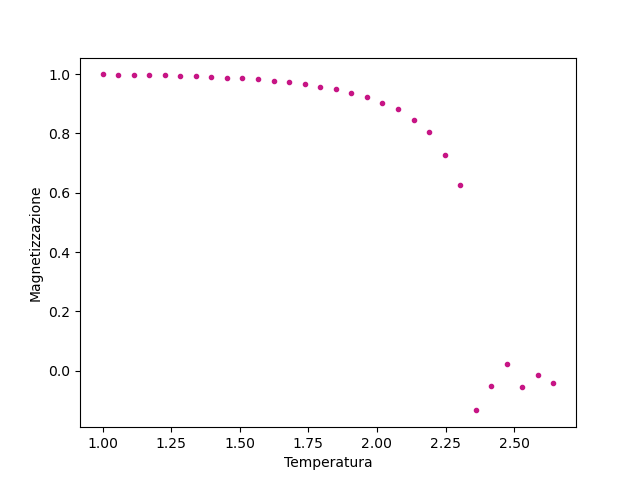

In [81]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, linewidth=1.0, marker='.', color = 'mediumvioletred')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Magnetizzazione')
plt.show()

In [83]:
def model_f(x, Tc, alpha, c):
    return (c*np.abs(x-Tc)**alpha)

In [84]:
x_data2 = x_data[(x_data >= 1) & (x_data<2.35)]
y_data2 = y_data[(x_data >= 1) & (x_data<2.35)]

In [85]:
popt, pcov = curve_fit(model_f, x_data2, y_data2, p0 = [2.3, 0.1, 1])
#popt := da i parametri ottimali della funzione dati i data
#pcov := covariance matrix che da una stima dell'errore sui parametri
print(popt)
print(pcov)

[2.29731567 0.09007709 1.00070402]
[[ 4.01580558e-06 -4.60052044e-06 -2.60836293e-06]
 [-4.60052044e-06  1.84960370e-05  1.11647074e-05]
 [-2.60836293e-06  1.11647074e-05  1.93176021e-05]]


In [86]:
Tc_new, alpha_new, c_new = popt
xmodel = np.linspace(min(x_data2), max(x_data2), 100)
ymodel = model_f(xmodel, Tc_new, alpha_new, c_new)

In [87]:
plt.scatter(x_data, y_data, marker = '.', color = 'mediumvioletred', label = 'numeric data')
plt.plot(xmodel, ymodel, color = 'k', label = 'theoretical data')
ax.set_title('N = 50')
ax.legend()

In [80]:
print(np.sqrt(np.diag(pcov)))

[0.32205261 0.04282628]
